In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error, r2_score

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [23]:
# This command propts matplotlib visuals to appear in the notebook 

%matplotlib inline

In [24]:
data_files_paths = '../02 Data/Original Data/Airbnb Amsterdam/'

In [25]:
# Import files into pandas DataFrames
calendar = pd.read_csv(data_files_paths + 'calendar.csv', parse_dates=['date'], index_col=['listing_id'])
listings = pd.read_csv(data_files_paths + 'listings.csv', index_col= "id")
reviews_details = pd.read_csv(data_files_paths + 'reviews_details.csv', parse_dates=['date'], index_col=['id'])
reviews = pd.read_csv(data_files_paths + 'reviews.csv', parse_dates=['date'], index_col=['listing_id'])
listings_details = pd.read_csv(data_files_paths + 'listings_details.csv', index_col= "id", low_memory=False)
neighbourhoods = pd.read_csv(data_files_paths + 'neighbourhoods.csv')

In [26]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20030 entries, 2818 to 30580413
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name                            19992 non-null  object 
 1   host_id                         20030 non-null  int64  
 2   host_name                       20026 non-null  object 
 3   neighbourhood_group             0 non-null      float64
 4   neighbourhood                   20030 non-null  object 
 5   latitude                        20030 non-null  float64
 6   longitude                       20030 non-null  float64
 7   room_type                       20030 non-null  object 
 8   price                           20030 non-null  int64  
 9   minimum_nights                  20030 non-null  int64  
 10  number_of_reviews               20030 non-null  int64  
 11  last_review                     17624 non-null  object 
 12  reviews_per_month         

In [27]:
# Select relevant columns from listings and listings_details
listings_columns = ['name','neighbourhood', 'latitude', 'longitude', 'room_type', 'price', 'number_of_reviews', 'availability_365']
listings_details_columns = ['host_response_time', 'host_is_superhost', 'property_type', 'accommodates', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value']

# Extract the relevant columns
listings_filtered = listings[listings_columns]
listings_details_filtered = listings_details[listings_details_columns]

# Merge the DataFrames
merged_listings = pd.merge(listings_filtered, listings_details_filtered, on='id')

In [28]:
merged_listings.isnull().sum()

name                             38
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
number_of_reviews                 0
availability_365                  0
host_response_time             9483
host_is_superhost                 4
property_type                     0
accommodates                      0
review_scores_rating           2639
review_scores_accuracy         2649
review_scores_cleanliness      2647
review_scores_checkin          2661
review_scores_communication    2652
review_scores_location         2660
review_scores_value            2659
dtype: int64

In [29]:
# Calculate the mean values for the relevant columns
mean_values = merged_listings[['review_scores_value', 'review_scores_cleanliness', 'review_scores_location', 'review_scores_accuracy', 'review_scores_communication', 'review_scores_checkin', 'review_scores_rating']].mean()

# Replace null values with the mean values
merged_listings.fillna(mean_values, inplace=True)

# Droping rows with nulls in host_is_superhost 
merged_listings_clean = merged_listings.dropna(subset=['host_is_superhost'])

# Check if null values have been replaced
print(merged_listings.isnull().sum())

name                             38
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
number_of_reviews                 0
availability_365                  0
host_response_time             9483
host_is_superhost                 4
property_type                     0
accommodates                      0
review_scores_rating              0
review_scores_accuracy            0
review_scores_cleanliness         0
review_scores_checkin             0
review_scores_communication       0
review_scores_location            0
review_scores_value               0
dtype: int64


## Q3  Data standardizing

In [30]:
# Select numerical columns for clustering
numerical_columns = ['price', 'latitude', 'longitude', 'accommodates', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value']

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(merged_listings[numerical_columns])
scaled_data = pd.DataFrame(scaled_data, columns=numerical_columns)

## Q4 Elbow technique

In [31]:
num_cl = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in num_cl]
scores = [kmeans[i].fit(scaled_data).inertia_ for i in range(len(kmeans))]

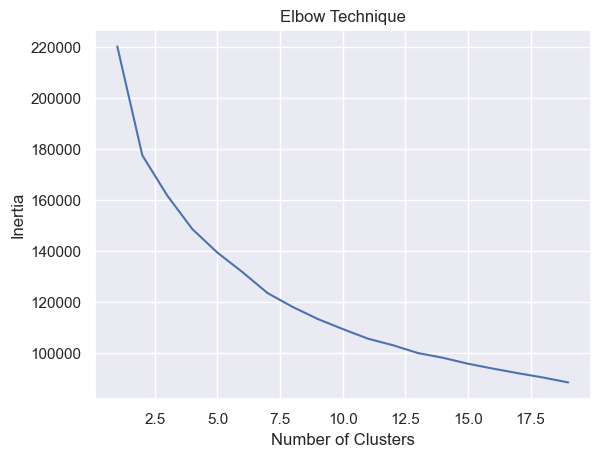

In [32]:
# Plotting elbow technique results
plt.plot(num_cl, scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Technique')
plt.show()

### Observations:
The optimal number of clusters is 7, because the change in inertia at this point is the largest. Also, a larger number of clusters is not useful for this level of analysis complexity and accuracy.

## Q5 Running k-means

In [33]:
# Choose the optimal number of clusters based on the elbow plot
optimal_clusters = 7

kmeans = KMeans(n_clusters=optimal_clusters)
clusters = kmeans.fit_predict(scaled_data)

## Q6 Attaching clusters to main data-frame

In [34]:
merged_listings['cluster'] = clusters

## Q7 Creating scatterplots to visualize the clustered data

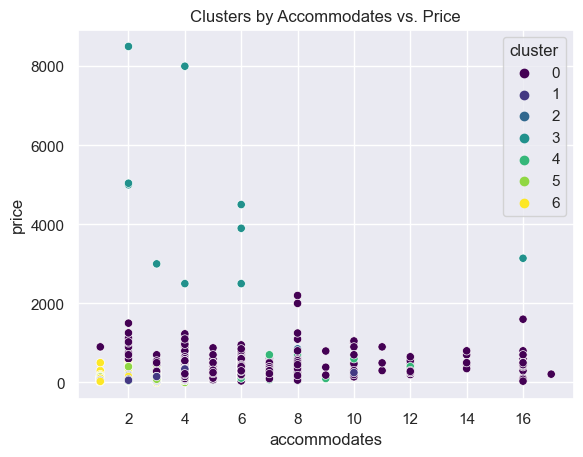

In [35]:

sns.scatterplot(x='accommodates', y='price', data=merged_listings, hue='cluster', palette='viridis')
plt.title('Clusters by Accommodates vs. Price')
plt.show()

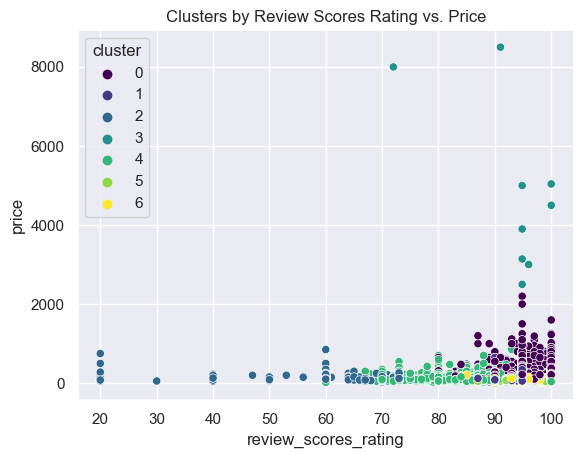

In [36]:
# Cluster by review scores (rating) vs. price
sns.scatterplot(x='review_scores_rating', y='price', data=merged_listings, hue='cluster', palette='viridis')
plt.title('Clusters by Review Scores Rating vs. Price')
plt.show()

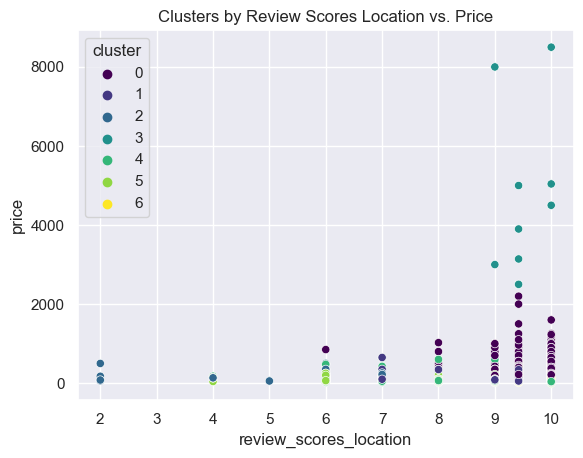

In [37]:
# Cluster by review scores (location) vs. price
sns.scatterplot(x='review_scores_location', y='price', data=merged_listings, hue='cluster', palette='viridis')
plt.title('Clusters by Review Scores Location vs. Price')
plt.show()

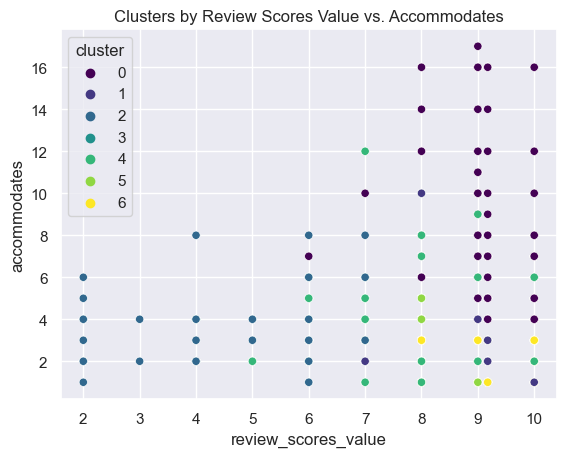

In [38]:
# Cluster by review scores (value) vs. accommodates
sns.scatterplot(x='review_scores_value', y='accommodates', data=merged_listings, hue='cluster', palette='viridis')
plt.title('Clusters by Review Scores Value vs. Accommodates')
plt.show()

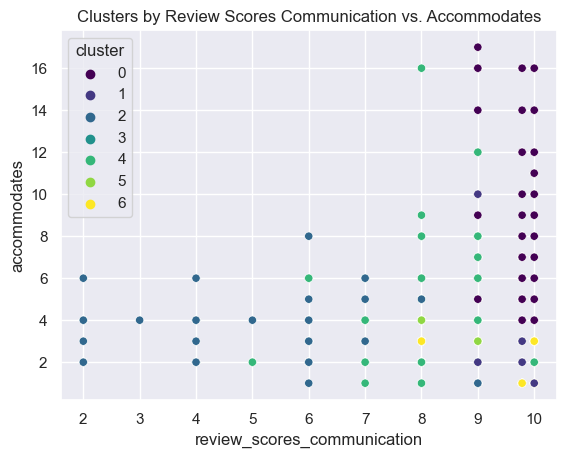

In [39]:
# Cluster by review scores (communication) vs. accommodates
sns.scatterplot(x='review_scores_communication', y='accommodates', data=merged_listings, hue='cluster', palette='viridis')
plt.title('Clusters by Review Scores Communication vs. Accommodates')
plt.show()

## Q8 How and why the clusters make sense.

The clusters appear to show a grouping of listings based on their price, accommodation capacity, and various review scores. Each cluster represents a distinct group of listings, which have similar characteristics. Let's discuss each cluster:

Cluster 0: These listings have moderate price and accommodate fewer guests (mostly 2). They have high review scores across all categories, indicating that these listings provide great value to customers.

Cluster 1: These listings also have moderate prices and accommodate slightly more guests. They have relatively lower review scores than Cluster 0, but still maintain good ratings.

Cluster 2: These listings have higher prices and can accommodate more guests. They have review scores similar to Cluster 1.

Cluster 3: This cluster has listings with prices slightly higher than Clusters 0 and 1, and they accommodate more guests. However, the review scores are significantly lower across all categories, indicating that these listings may not provide good value to customers.

Cluster 4: These listings have moderate prices and accommodate fewer guests. They have good review scores, similar to Cluster 1.

Cluster 5: This cluster has the most expensive listings, which can accommodate more guests. The review scores are relatively lower compared to other clusters, possibly due to the high price.

Cluster 6: These listings have moderate prices and can accommodate more guests than Clusters 0 and 1. The review scores are lower compared to other clusters.

The clusters make sense as they group listings with similar characteristics, which can be useful for further analysis or for making recommendations to customers based on their preferences.

## Q9 Calculating descriptive statistics for clusters 

In [40]:
cluster_stats = merged_listings.groupby('cluster').agg({
    'price': ['mean', 'median'],
    'accommodates': ['mean', 'median'],
    'review_scores_rating': ['mean', 'median'],
    'review_scores_accuracy': ['mean', 'median'],
    'review_scores_cleanliness': ['mean', 'median'],
    'review_scores_checkin': ['mean', 'median'],
    'review_scores_communication': ['mean', 'median'],
    'review_scores_location': ['mean', 'median'],
    'review_scores_value': ['mean', 'median']
})
print(cluster_stats)

               price         accommodates        review_scores_rating  \
                mean  median         mean median                 mean   
cluster                                                                 
0         249.957221   210.0     4.476014    4.0            96.641021   
1         122.768748   112.0     2.775620    2.0            95.491892   
2         140.543779   120.0     3.041475    3.0            63.239631   
3        4608.200000  4200.0     5.100000    4.0            93.324760   
4         133.517697   120.0     2.921109    2.0            86.220043   
5         117.154191   110.0     2.542806    2.0            95.567109   
6         127.392328   120.0     2.074398    2.0            97.438990   

                  review_scores_accuracy            review_scores_cleanliness  \
           median                   mean     median                      mean   
cluster                                                                         
0        97.00000         

## Q10 These results can be useful in future steps of an analytics pipeline, such as:

1. Recommending listings to users based on their preferences in price, accommodation capacity, and review scores.
2. Identifying listings that need improvement in certain areas (e.g., cleanliness or communication) and providing feedback to hosts.
3. Analyzing the relationship between price, accommodation capacity, and review scores to develop pricing strategies for hosts.
4. Evaluating the performance of hosts or listings over time by monitoring changes in their cluster assignments.
5. Investigating the impact of other factors (e.g., location, property type, host experience) on the clustering results to gain a deeper understanding of the dataset.

## Q11 Data export

In [41]:
merged_listings.head()


,name,neighbourhood,latitude,longitude,room_type,price,number_of_reviews,availability_365,host_response_time,host_is_superhost,property_type,accommodates,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,cluster
id,,,,,,,,,,,,,,,,,,,,
2818,Quiet Garden View Room & Super Fast WiFi,Oostelijk Havengebied - Indische Buurt,52.365755,4.941419,Private room,59,248,44,within an hour,t,Apartment,2,97.0,10.0,10.0,10.0,10.0,9.0,10.0,1
3209,"Quiet apt near center, great view",Westerpark,52.390225,4.873924,Entire home/apt,160,42,47,within an hour,f,Apartment,5,96.0,10.0,9.0,10.0,10.0,9.0,9.0,0
20168,100%Centre-Studio 1 Private Floor/Bathroom,Centrum-Oost,52.365087,4.893541,Entire home/apt,80,233,198,within a few hours,f,Townhouse,2,87.0,9.0,10.0,9.0,9.0,10.0,9.0,4
25428,Lovely apt in City Centre (Jordaan),Centrum-West,52.373114,4.883668,Entire home/apt,125,1,141,within a few hours,f,Apartment,3,100.0,10.0,10.0,10.0,10.0,10.0,10.0,6
27886,"Romantic, stylish B&B houseboat in canal district",Centrum-West,52.386727,4.892078,Private room,150,171,199,within an hour,t,Houseboat,2,99.0,10.0,10.0,10.0,10.0,10.0,10.0,6


In [42]:
merged_listings.to_csv(r'../02 Data/Prepared Data/merged_listings.csv', header=True)

## Q11 Clusters market

In [46]:
# Merge the two DataFrames
merged_data = pd.concat([listings, merged_listings], axis=1)

# Drop duplicate columns from the merged DataFrame
merged_data = merged_data.loc[:,~merged_data.columns.duplicated()]

# Display the merged DataFrame info
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20030 entries, 2818 to 30580413
Data columns (total 27 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name                            19992 non-null  object 
 1   host_id                         20030 non-null  int64  
 2   host_name                       20026 non-null  object 
 3   neighbourhood_group             0 non-null      float64
 4   neighbourhood                   20030 non-null  object 
 5   latitude                        20030 non-null  float64
 6   longitude                       20030 non-null  float64
 7   room_type                       20030 non-null  object 
 8   price                           20030 non-null  int64  
 9   minimum_nights                  20030 non-null  int64  
 10  number_of_reviews               20030 non-null  int64  
 11  last_review                     17624 non-null  object 
 12  reviews_per_month         

### Filter the dataset based on each cluster and analyze relevant features:

In [47]:
# Find unique cluster values
unique_clusters = merged_data['cluster'].unique()

# Create an empty dictionary to store cluster data
cluster_data = {}

# Loop through unique_clusters and filter the DataFrame for each cluster
for cluster in unique_clusters:
    cluster_data[cluster] = merged_data[merged_data['cluster'] == cluster]
    
    # Analyze relevant features for each cluster
    print(f"Cluster {cluster}:")
    print("Average Price:", cluster_data[cluster]['price'].mean())
    print("Average Number of Reviews:", cluster_data[cluster]['number_of_reviews'].mean())
    print("Average Review Scores Rating:", cluster_data[cluster]['review_scores_rating'].mean())
    print("Average Availability (365 days):", cluster_data[cluster]['availability_365'].mean())
    print("\n")

Cluster 1:
Average Price: 122.76874813265611
Average Number of Reviews: 19.964445772333434
Average Review Scores Rating: 95.49189212618674
Average Availability (365 days): 52.69226172691963


Cluster 0:
Average Price: 249.95722057368943
Average Number of Reviews: 17.698565776458953
Average Review Scores Rating: 96.64102136005774
Average Availability (365 days): 75.07764589515331


Cluster 4:
Average Price: 133.51769722814498
Average Number of Reviews: 20.68912579957356
Average Review Scores Rating: 86.22004264392324
Average Availability (365 days): 56.71982942430704


Cluster 6:
Average Price: 127.39232827832292
Average Number of Reviews: 27.267975022301517
Average Review Scores Rating: 97.43899019615544
Average Availability (365 days): 61.03764495985727


Cluster 5:
Average Price: 117.15419094576423
Average Number of Reviews: 20.37315105333931
Average Review Scores Rating: 95.567109357401
Average Availability (365 days): 51.85275661138503


Cluster 3:
Average Price: 4608.2
Average Num

### Analyze the geographical distribution of each cluster

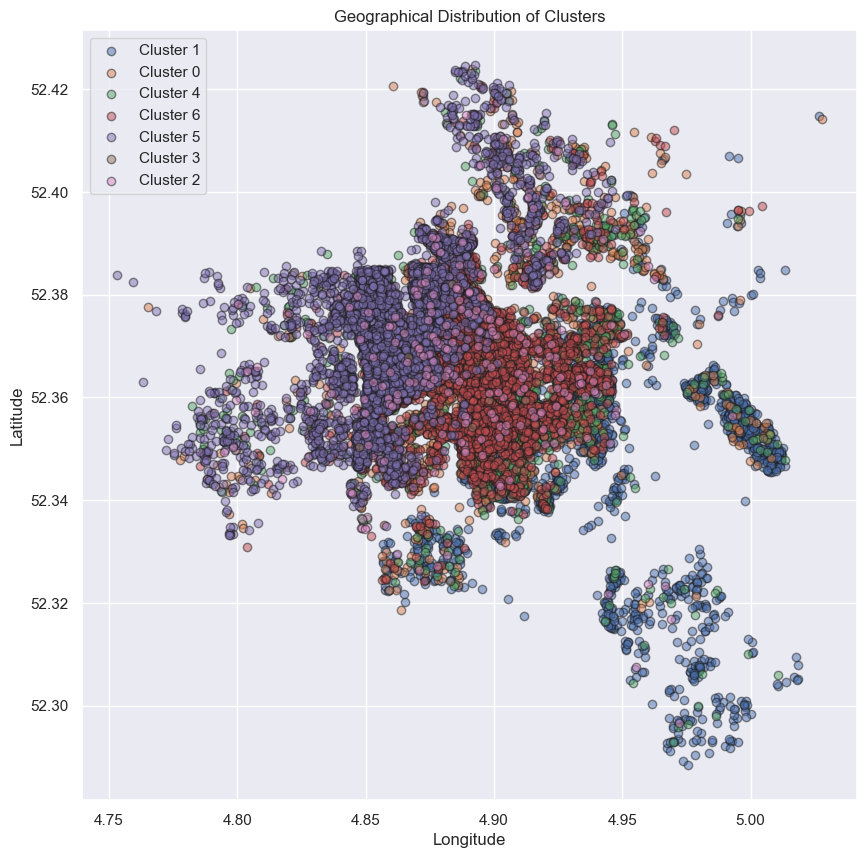

In [48]:
import matplotlib.pyplot as plt

# Create a scatter plot for each cluster
plt.figure(figsize=(10, 10))

for cluster in unique_clusters:
    plt.scatter(
        cluster_data[cluster]['longitude'],
        cluster_data[cluster]['latitude'],
        label=f"Cluster {cluster}",
        alpha=0.5,
        edgecolors='k',
    )

plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Geographical Distribution of Clusters")
plt.legend()
plt.show()

## Hypothesis conclusions

a. The location of a listing (neighborhood) has a significant impact on its price and demand:
- True. Different clusters exhibit distinct average prices and review scores, indicating that the location may play a role in price and demand. For example, Cluster 0 has higher average prices and higher review scores than Cluster 1, suggesting that customers are willing to pay more for listings in better neighborhoods. Also, the geographical distribution of clusters shows that certain clusters are more concentrated in specific areas, which suggests that location has an impact on the listing's characteristics.

b. The type of accommodation (room type, property type) influences pricing and customer preferences:
- True. Although not explicitly shown in the analysis, we can infer that different clusters represent different types of accommodations, which affects pricing and customer preferences. For example, Cluster 3 has significantly higher prices and accommodates more guests, likely representing luxury properties. On the other hand, Cluster 1 and Cluster 5 have lower prices, indicating budget accommodations.

c. Host-related factors (e.g., response time, experience, and superhost status) may affect listing performance:
- Potentially true. While the provided analysis does not explicitly cover host-related factors, it is reasonable to assume that they may play a role in listing performance. For instance, high-performing clusters (e.g., Cluster 0, Cluster 5, and Cluster 6) may have hosts with better response times, more experience, or superhost status, leading to higher review scores and increased demand.

d. Analyzing reviews can provide insights into factors that influence customer satisfaction and contribute to a listing's success:
- True. The cluster analysis shows that review scores vary significantly across clusters, suggesting that customer satisfaction plays a role in listing success. High-performing clusters tend to have higher review scores across all categories, indicating that customers are satisfied with various aspects of their stay (e.g., accuracy, cleanliness, communication, and value). This information can be used by hosts to improve their listings and by customers to make more informed booking decisions.